####Title: Analyzing Sales Data for Business Insights

Objective:
Evaluate the ability to clean, analyze, and visualize data to provide actionable insights.

Task Overview:
You are provided with a dataset containing sales transactions for a retail store. The dataset includes the following fields:

Transaction ID: Unique identifier for each transaction
Date: Date of the transaction
Product Category: Category of the product sold
Product Name: Name of the product
Quantity Sold: Number of items sold
Unit Price: Price per unit of the product
Total Revenue: Total revenue generated by the transaction
Region: Region where the sale occurred

Your goal is to perform the following tasks within two hours:

Task Steps:

Data Cleaning (30 minutes):
Identify and handle missing or inconsistent values.
Check for duplicate entries and remove them if necessary.
Ensure all numerical data types (e.g., revenue, quantity) are correctly formatted.

Exploratory Data Analysis (EDA) (45 minutes):
Calculate summary statistics (e.g., mean, median, mode, standard deviation) for key numerical fields.
Identify the top 5 best-selling products and their revenue contributions.
Determine which region generates the highest total revenue and which region has the lowest average revenue per transaction.
Plot a time-series chart showing trends in total revenue over time.

Insights and Recommendations (30 minutes):
Identify seasonal trends or patterns in sales data.
Provide at least three actionable business recommendations based on your analysis (e.g., marketing focus areas, inventory management).

Deliverables (15 minutes):
A summary report with key insights and recommendations (in a PDF or Word document).
A notebook or script (in Python, R, or your preferred language) showcasing the data analysis process, with well-commented code.

Tools Required:
Software: Python (Pandas, Matplotlib/Seaborn) or R (tidyverse, ggplot2)
Data Format: CSV file (provided with task instructions)


In [1]:
import pandas as pd

In [49]:
import matplotlib.pyplot as plt 

In [51]:
sd=pd.read_csv('D:/Internship/Sales_Data.csv') 

In [53]:
sd.head()

,Transaction ID,Date,Product Category,Product Name,Quantity Sold,Unit Price,Total Revenue,Region
0,2cac9657-8ec1-4630-aae3-c5509bac12c2,2024-02-12,Electronics,Many,1,372.07,372.07,South
1,05b6b1f0-a0ce-42bc-b1a5-bdc267f46bf0,2024-07-13,Clothing,Rate,5,369.55,1847.75,North
2,d0554257-5cd5-4445-9d54-a309697b7594,2024-04-11,Toys,Modern,14,20.73,290.22,North
3,bb50c0c1-106c-4172-ae74-9f949c0ce005,2024-08-23,Clothing,Job,8,255.15,2041.20,North
4,e30109e2-3933-4f8b-aad0-61a17ac8d1d3,2024-12-11,Toys,Paper,7,359.43,2516.01,West


In [55]:
sd.isnull().sum()

Transaction ID       0
Date                 0
Product Category     0
Product Name         0
Quantity Sold        0
Unit Price           0
Total Revenue       10
Region               0
dtype: int64

In [87]:
sd.rename(columns={'Total Revenue': 'Total_Revenue'}, inplace=True)

In [89]:
sd.rename(columns={'Unit Price': 'Unit_Price'}, inplace=True)

In [91]:
sd.rename(columns={'Quantity Sold': 'Quantity_Sold'}, inplace=True)

In [93]:
sd.Total_Revenue.fillna(sd.Total_Revenue.mean(),inplace =True)

C:\Users\HP\AppData\Local\Temp\ipykernel_22100\1301876326.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sd.Total_Revenue.fillna(sd.Total_Revenue.mean(),inplace =True)


In [67]:
sd.select_dtypes(include='object').columns

Index(['Transaction ID', 'Date', 'Product Category', 'Product Name', 'Region'], dtype='object')

In [95]:
print(sd['Total_Revenue'].describe())

count    1005.000000
mean     2595.088382
std      2197.440465
min         8.270000
25%       762.400000
50%      2041.200000
75%      3966.840000
max      9981.600000
Name: Total_Revenue, dtype: float64


In [97]:
print(sd['Unit_Price'].describe())

count    1005.000000
mean      245.456498
std       142.508080
min         5.080000
25%       123.530000
50%       241.340000
75%       372.070000
max       499.990000
Name: Unit_Price, dtype: float64


In [99]:
print(sd['Quantity_Sold'].describe())

count    1005.000000
mean       10.751244
std         5.877722
min         1.000000
25%         6.000000
50%        11.000000
75%        16.000000
max        20.000000
Name: Quantity_Sold, dtype: float64


In [103]:

df = pd.DataFrame(sd)

# Calculate total revenue for each product
df['Total_Revenue'] = df['Quantity_Sold'] * df['Unit_Price']

# Sort products by revenue in descending order
df_sorted = df.sort_values(by='Total_Revenue', ascending=False)


In [115]:
df_sorted

,Transaction ID,Date,Product Category,Product Name,Quantity_Sold,Unit_Price,Total_Revenue,Region
416,4482a990-a788-4c13-9b09-4d71ebf7464b,2024-11-26,Home Goods,Seek,20,499.08,9981.60,East
835,c78e0db3-25c9-44ba-973e-11698ab7284d,2024-10-08,Home Goods,Keep,20,492.71,9854.20,West
186,9000ce0c-d326-487c-b26f-792db4c6c60f,2024-08-17,Home Goods,Ball,19,495.07,9406.33,East
601,128934b1-54f5-417e-aac6-44da2eceea5a,2024-11-13,Home Goods,Prove,19,488.78,9286.82,North
489,4bf9f8eb-427b-47e9-8c92-4b5b7d92326c,2024-04-13,Toys,Television,20,460.66,9213.20,North
...,...,...,...,...,...,...,...,...
921,138bbf56-7022-4560-9122-5af96fa689d3,2024-11-28,Books,Partner,1,23.67,23.67,South
512,3a2b7411-1229-46d1-a17a-78b172b2f70d,2024-04-14,Home Goods,Budget,2,9.59,19.18,North
324,2162d085-b79d-4f0f-a2be-c70d89e9ee6d,2024-02-17,Toys,Such,2,8.81,17.62,East
917,8dd11886-f718-4156-a0b4-a367af6183cd,2025-01-09,Home Goods,Among,2,7.33,14.66,East


Identify the Top 5

In [120]:
top_5 = df_sorted.head(5)

total_revenue = df['Total_Revenue'].sum()

top_5['Revenue Contribution (%)'] = (top_5['Total_Revenue'] / total_revenue) * 100

print("Top 5 Best-Selling Products and Revenue Contribution:")
print(top_5[['Product Category', 'Total_Revenue', 'Revenue Contribution (%)']])

Top 5 Best-Selling Products and Revenue Contribution:
    Product Category  Total_Revenue  Revenue Contribution (%)
416       Home Goods        9981.60                  0.383469
835       Home Goods        9854.20                  0.378575
186       Home Goods        9406.33                  0.361369
601       Home Goods        9286.82                  0.356777
489             Toys        9213.20                  0.353949


C:\Users\HP\AppData\Local\Temp\ipykernel_22100\1670914242.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5['Revenue Contribution (%)'] = (top_5['Total_Revenue'] / total_revenue) * 100


 Determine which region generates the highest total revenue and which region has the lowest average revenue per transaction.


In [125]:
df = pd.DataFrame(df)

region_summary = df.groupby('Region').agg(
    Total_Revenue=('Total_Revenue', 'sum'),
    Average_Revenue=('Total_Revenue', 'mean')
).reset_index()

highest_total_revenue_region = region_summary.loc[region_summary['Total_Revenue'].idxmax(), 'Region']

lowest_avg_revenue_region = region_summary.loc[region_summary['Average_Revenue'].idxmin(), 'Region']

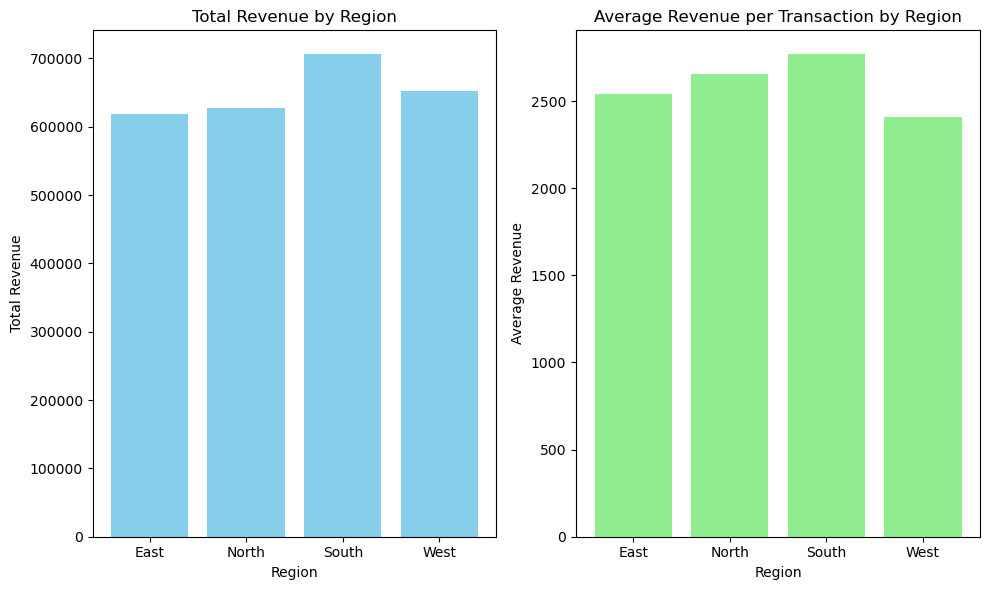

Region with the highest total revenue: South
Region with the lowest average revenue per transaction: West


In [127]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.bar(region_summary['Region'], region_summary['Total_Revenue'], color='skyblue')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')

plt.subplot(1, 2, 2)
plt.bar(region_summary['Region'], region_summary['Average_Revenue'], color='lightgreen')
plt.title('Average Revenue per Transaction by Region')
plt.xlabel('Region')
plt.ylabel('Average Revenue')

plt.tight_layout()
plt.show()

print(f"Region with the highest total revenue: {highest_total_revenue_region}")
print(f"Region with the lowest average revenue per transaction: {lowest_avg_revenue_region}")

Plot a time-series chart showing trends in total revenue over time.

In [130]:
df.columns

Index(['Transaction ID', 'Date', 'Product Category', 'Product Name',
       'Quantity_Sold', 'Unit_Price', 'Total_Revenue', 'Region'],
      dtype='object')

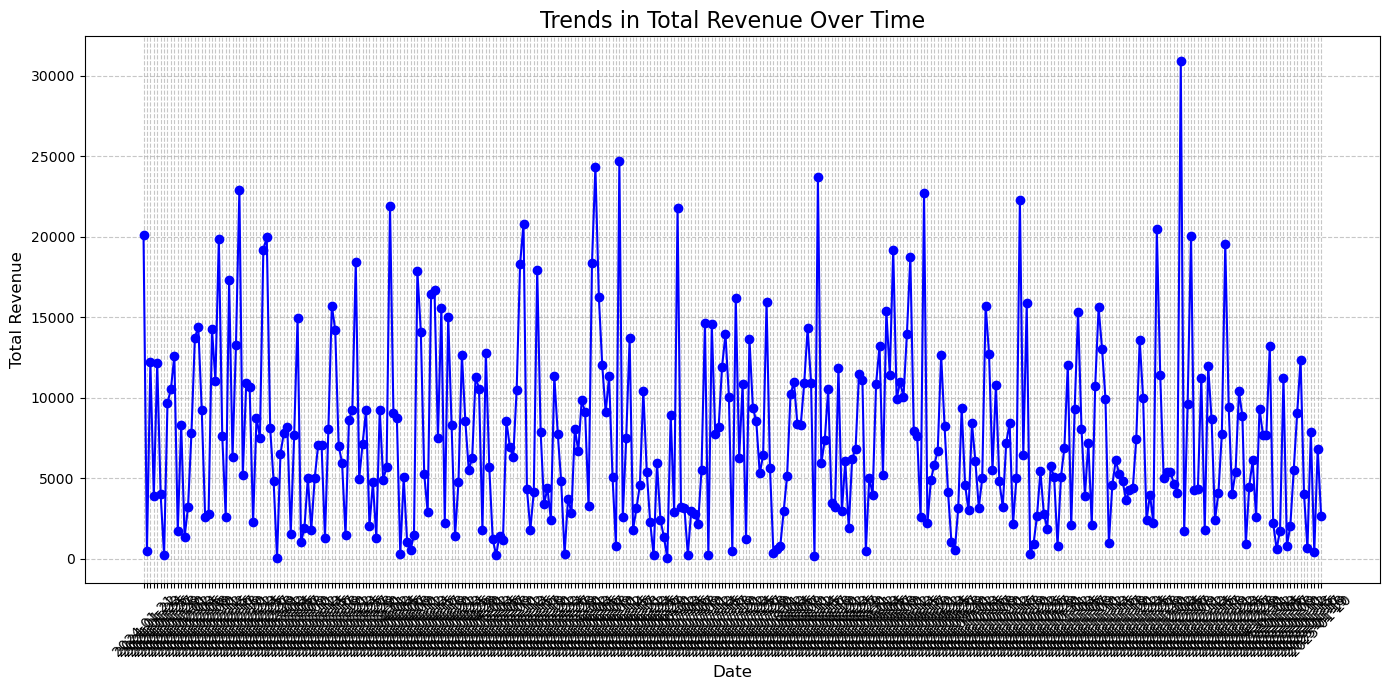

In [138]:
revenue_trend = sd.groupby('Date')['Total_Revenue'].sum().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(revenue_trend['Date'], revenue_trend['Total_Revenue'], marker='o', linestyle='-', color='blue')

# Customize the plot
plt.title('Trends in Total Revenue Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()